<a href="https://colab.research.google.com/github/Jacin21/Task7/blob/main/Assessment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [5]:
train=pd.read_csv('/content/trainKNN.txt', header=None, names=["Id number", "RI", "Na", "Mg", "Al", "Si","K","Ca","Ba",'Fe','Type of glass'],index_col='Id number')
train.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
Id number,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [7]:
test=pd.read_csv('/content/testKNN.txt', header=None, names=["Id number", "RI", "Na", "Mg", "Al", "Si","K","Ca","Ba",'Fe','Type of glass'],index_col='Id number')
test.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
Id number,,,,,,,,,,
68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17,1
69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1
70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1
144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,2
145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24,2


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 1 to 211
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             196 non-null    float64
 1   Na             196 non-null    float64
 2   Mg             196 non-null    float64
 3   Al             196 non-null    float64
 4   Si             196 non-null    float64
 5   K              196 non-null    float64
 6   Ca             196 non-null    float64
 7   Ba             196 non-null    float64
 8   Fe             196 non-null    float64
 9   Type of glass  196 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 68 to 214
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             18 non-null     float64
 1   Na             18 non-null     float64
 2   Mg             18 non-null     float64
 3   Al             18 non-null     float64
 4   Si             18 non-null     float64
 5   K              18 non-null     float64
 6   Ca             18 non-null     float64
 7   Ba             18 non-null     float64
 8   Fe             18 non-null     float64
 9   Type of glass  18 non-null     int64  
dtypes: float64(9), int64(1)
memory usage: 1.5 KB


In [10]:
train.isnull().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [11]:
test.isnull().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [12]:
X=train.drop(columns='Type of glass')


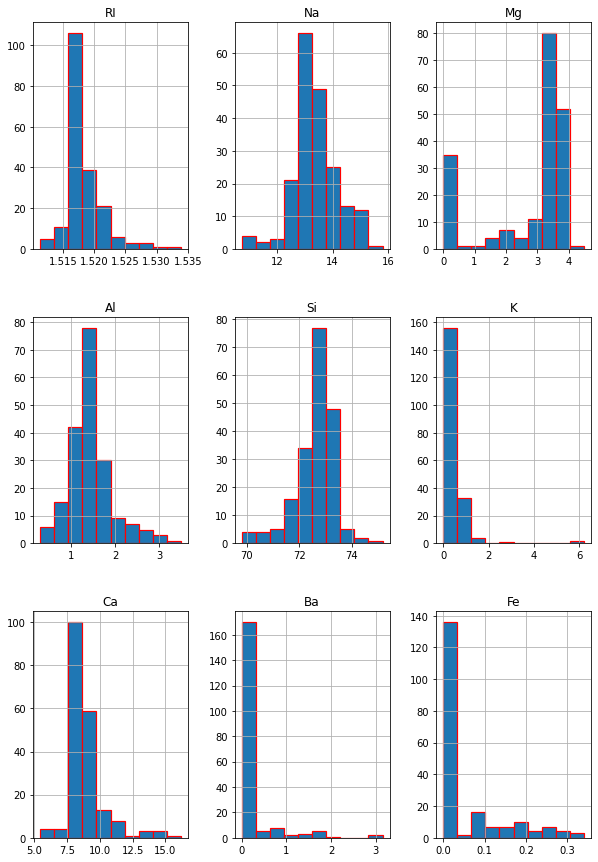

In [16]:
X.hist(edgecolor = 'red', linewidth = 1.2)
fig = plt.gcf()
fig.set_size_inches(10,15)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


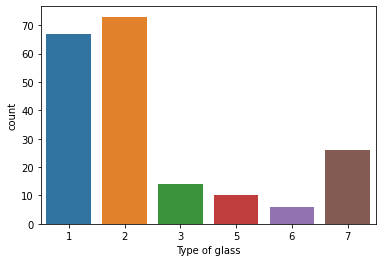

In [17]:
sns.countplot(train['Type of glass'])


Training the model

In [18]:
x_train = train.drop(columns=['Type of glass',],axis=1)
x_test = test.drop(columns=['Type of glass'],axis=1)
y_train = train['Type of glass']
y_test = test['Type of glass']

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Euclidean Metric


In [20]:
classifier= KNeighborsClassifier(n_neighbors=5,metric='euclidean', p=2 )  
classifier.fit(x_train, y_train)  
KNeighborsClassifier(metric='euclidean')
euclid_pred = classifier.predict(x_test)
euclid_score = accuracy_score(y_test,euclid_pred)
euclid_score = euclid_score*100
euclid_score

55.55555555555556

Manhatten Matrix


In [21]:
classifier= KNeighborsClassifier(metric='manhattan')  
classifier.fit(x_train, y_train)

KNeighborsClassifier(metric='manhattan')

In [22]:
manhat_pred = classifier.predict(x_test)
manhat_score= accuracy_score(y_test,manhat_pred)*100
manhat_score

55.55555555555556

In [25]:
print(classification_report(y_test,manhat_pred))


              precision    recall  f1-score   support

           1       0.43      1.00      0.60         3
           2       0.40      0.67      0.50         3
           3       0.00      0.00      0.00         3
           5       1.00      0.33      0.50         3
           6       1.00      0.33      0.50         3
           7       0.75      1.00      0.86         3

    accuracy                           0.56        18
   macro avg       0.60      0.56      0.49        18
weighted avg       0.60      0.56      0.49        18



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
